In [1]:
from sklearn.linear_model import LogisticRegression
import utils
from sklearn.metrics import matthews_corrcoef

# maximum of 200 $a_p$'s

In [2]:
path = r"..\data_files\parquet_by_conductors\ecq_B_200_cond_0_123456_one_per_iso.parquet"
df = utils.load_data(path)

Loaded the big dataset with 200 a_p's and 541081 curves..


## overlaped intervals

In [9]:
# choose your desired bounds (including the end points)
bounds_list = [(0,2**i) for i in range(10,18)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired number of a_p's
n_ap = 100

# choose your metric
metric = matthews_corrcoef

In [10]:
res_dict = {}
# Example usage
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict[bounds] = utils.Generate_AccByApRange_df(df, lower_bound, upper_bound, model, n_ap, ap_selection="rolling", stride=10, metric = metric)

**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 1024]..
There are 2544 curves within the conductor range [0, 1024].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 2048]..
There are 6007 curves within the conductor range [0, 2048].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 4096]..
There are 13754 curves within the conductor range [0, 4096].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 8192]..
There are 30523 curves within the conductor range [0, 8192].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 16384]..
There are 65421 curves with

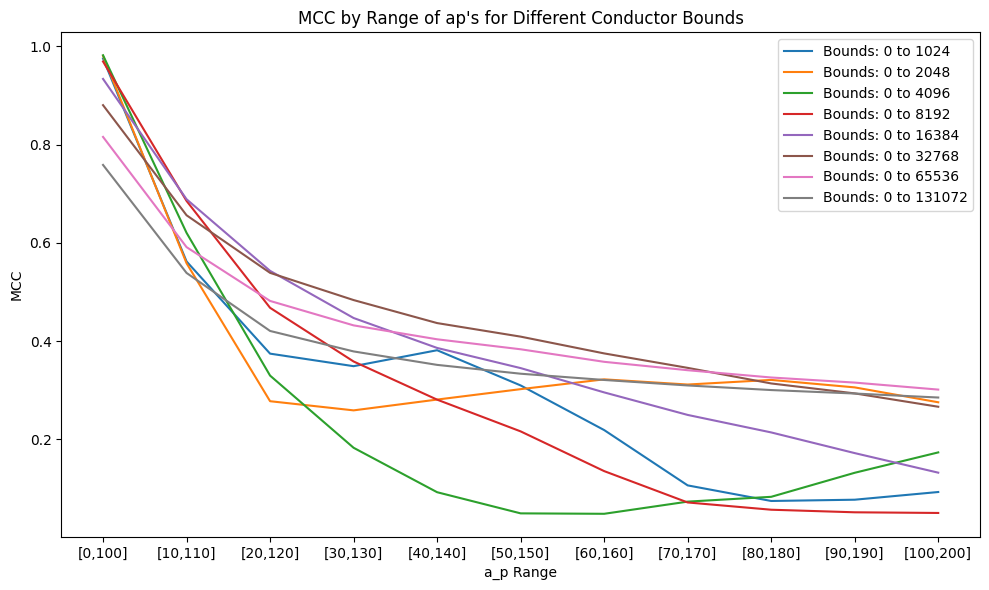

In [11]:
utils.plot_AccuracyByApRange(res_dict, metric_name = metric.__name__, size = (10,6))

## nonoverlaped intervals

In [17]:
# choose your desired bounds (including the end points)
bounds_list = [(0,2**10)]+[(2**i + 1,2**(i+1)) for i in range(10,17)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired number of a_p's
n_ap = 100

# choose your metric
metric = matthews_corrcoef

In [18]:
res_dict_2 = {}
# Example usage
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict_2[bounds] = utils.Generate_AccByApRange_df(df, lower_bound, upper_bound, model, n_ap, ap_selection="rolling", stride=10, metric = metric)

**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 1024]..
There are 2544 curves within the conductor range [0, 1024].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [1025, 2048]..
There are 3463 curves within the conductor range [1025, 2048].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [2049, 4096]..
There are 7747 curves within the conductor range [2049, 4096].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [4097, 8192]..
There are 16769 curves within the conductor range [4097, 8192].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [8193, 16384]..
There a

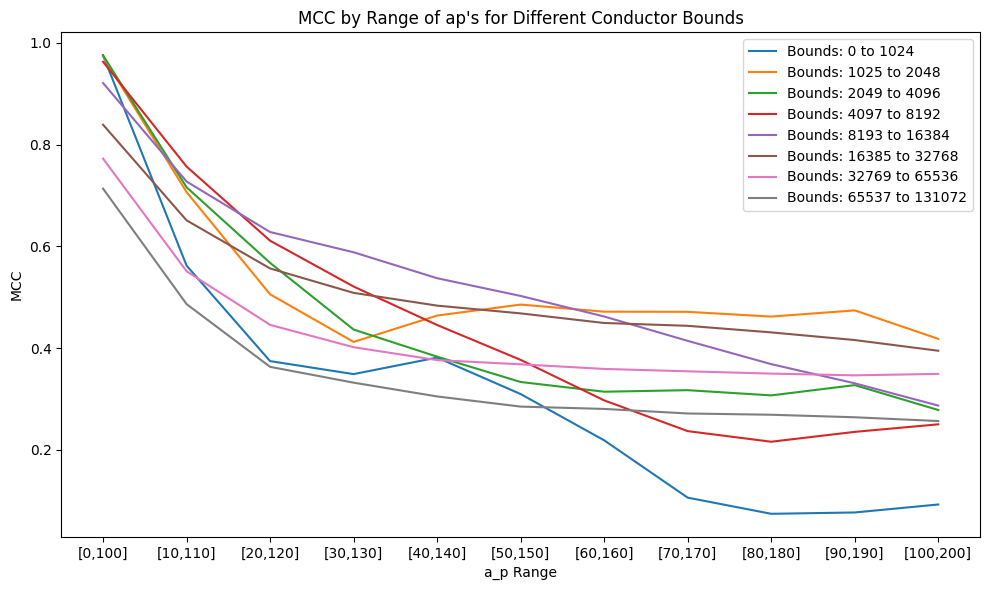

In [19]:
utils.plot_AccuracyByApRange(res_dict_2, metric_name = metric.__name__, size = (10,6))

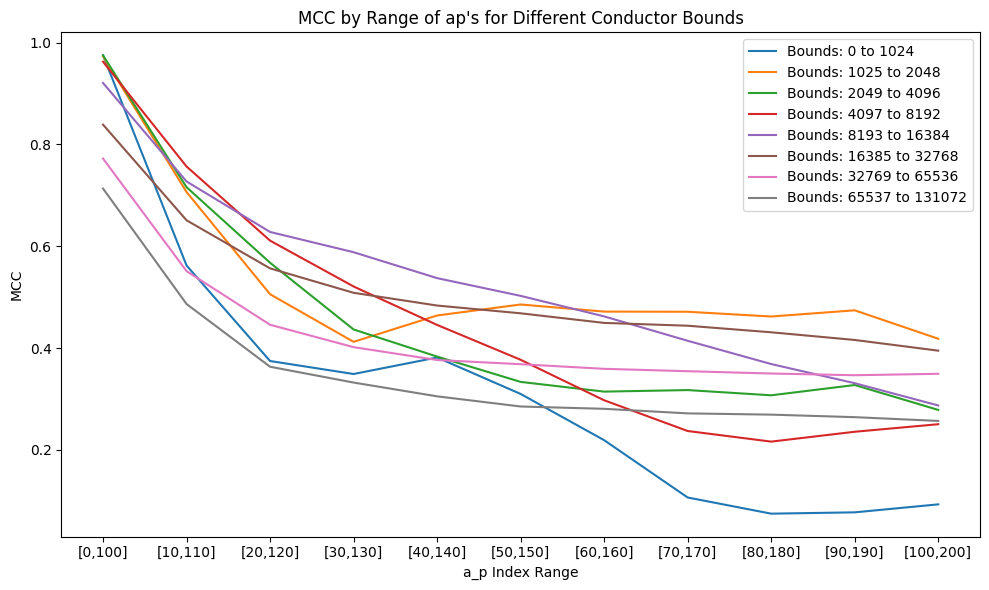

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
for bounds, acc_df in res_dict_2.items():
    lower_bound, upper_bound = bounds
    plt.plot(acc_df['a_p range'], acc_df['performance'], label=f'Bounds: {lower_bound} to {upper_bound}')    

# skip x-axis labels to avoid overlap
plt.title('MCC by Range of ap\'s for Different Conductor Bounds')
plt.xlabel('a_p Index Range')
plt.ylabel('MCC')
plt.legend()  # Show legend to identify the lines
plt.tight_layout()
plt.show()

# maximum of 1000 $a_p$'s

## overlapped intervals

In [21]:
path = r"../data_files/1000_aps/ecq_B_1000_all_one_per_iso_1_131017.parquet"
df = utils.load_data(path)

Loaded the big dataset with 1000 a_p's and 574948 curves..


In [22]:
# choose your desired bounds (including the end points)
bounds_list = [(0,2**i) for i in range(10,18)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired number of a_p's
n_ap = 100

# choose your metric
metric = matthews_corrcoef

In [23]:
res_dict_3 = {}
# Example usage
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict_3[bounds] = utils.Generate_AccByApRange_df(df, lower_bound, upper_bound, model, n_ap, ap_selection="rolling", stride=10, metric = metric)

**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 1024]..
There are 2544 curves within the conductor range [0, 1024].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 2048]..
There are 6007 curves within the conductor range [0, 2048].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 4096]..
There are 13754 curves within the conductor range [0, 4096].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 8192]..
There are 30523 curves within the conductor range [0, 8192].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 16384]..
There are 65421 curves with

In [ ]:
utils.plot_AccuracyByApRange(res_dict_3, metric_name = metric.__name__, size = (10,6))

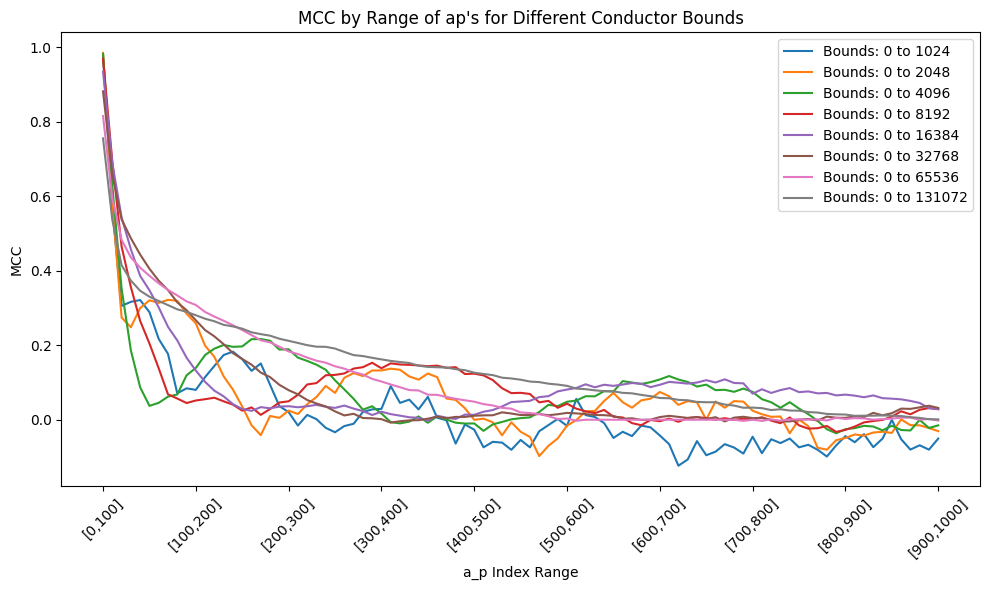

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
for bounds, acc_df in res_dict_3.items():
    lower_bound, upper_bound = bounds
    plt.plot(acc_df['a_p range'], acc_df['performance'], label=f'Bounds: {lower_bound} to {upper_bound}')    

# skip x-axis labels to avoid overlap
plt.xticks(range(0, len(acc_df), 10), rotation=45)        
plt.title('MCC by Range of ap\'s for Different Conductor Bounds')
plt.xlabel('a_p Index Range')
plt.ylabel('MCC')
plt.legend()  # Show legend to identify the lines
plt.tight_layout()
plt.show()

## nonoverlapped intervals

In [31]:
# choose your desired bounds (including the end points)
bounds_list = [(0,2**10)]+[(2**i + 1,2**(i+1)) for i in range(10,17)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired number of a_p's
n_ap = 100

# choose your metric
metric = matthews_corrcoef

In [32]:
res_dict_4 = {}
# Example usage
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict_4[bounds] = utils.Generate_AccByApRange_df(df, lower_bound, upper_bound, model, n_ap, ap_selection="rolling", stride=10, metric = metric)

**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 1024]..
There are 2544 curves within the conductor range [0, 1024].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [1025, 2048]..
There are 3463 curves within the conductor range [1025, 2048].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [2049, 4096]..
There are 7747 curves within the conductor range [2049, 4096].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [4097, 8192]..
There are 16769 curves within the conductor range [4097, 8192].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [8193, 16384]..
There a

In [ ]:
utils.plot_AccuracyByApRange(res_dict_4, metric_name = metric.__name__, size = (10,6))

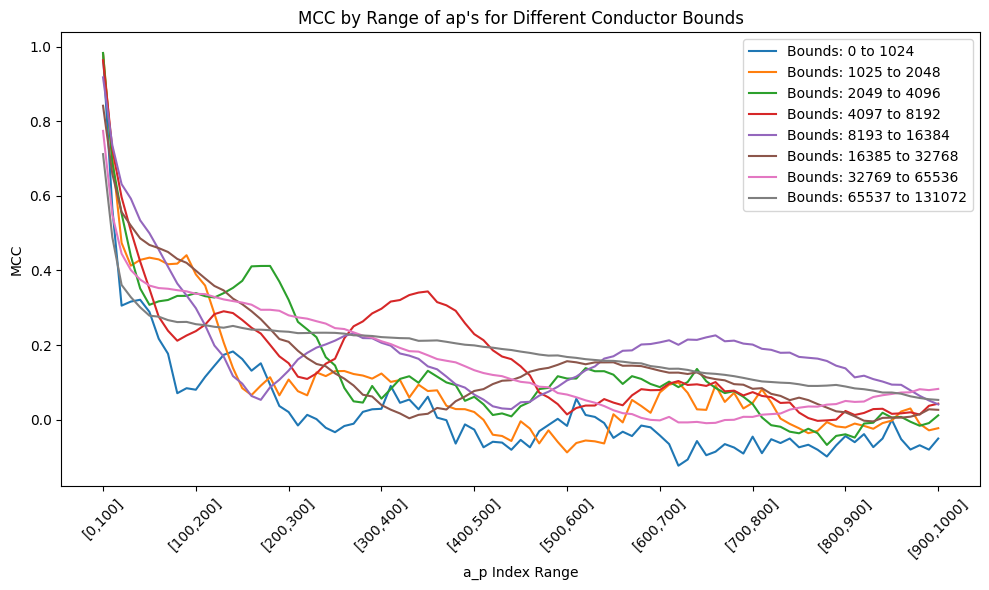

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
for bounds, acc_df in res_dict_4.items():
    lower_bound, upper_bound = bounds
    plt.plot(acc_df['a_p range'], acc_df['performance'], label=f'Bounds: {lower_bound} to {upper_bound}')    

# skip x-axis labels to avoid overlap
plt.xticks(range(0, len(acc_df), 10), rotation=45)        
plt.title('MCC by Range of ap\'s for Different Conductor Bounds')
plt.xlabel('a_p Index Range')
plt.ylabel('MCC')
plt.legend()  # Show legend to identify the lines
plt.tight_layout()
plt.show()